# Simple Linear Regression

This notebook demonstrates how to implement Simple Linear Regression from scratch using gradient descent. We'll visualize the learning process through animation.

## Importing Required Libraries

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.animation import FuncAnimation
from tqdm.notebook import tqdm
from IPython.display import display

## Define Constants

In [2]:
# Dataset paths and column names
SLR_DATAPATH = 'data/Salary_dataset.csv'
SLR_XCOL = 'YearsExperience'
SLR_YCOL = 'Salary'

## Simple Linear Regression Class

In [3]:
class SimpleLinearRegression:
    def __init__(self, X, y, epochs=1000, lr=0.01):
        self._X = X
        self._y = y
        self._epochs = epochs
        self._lr = lr
        self._n = len(X)
        assert self._n == len(
            y), 'number of targets must be the same as number of features'

        self.theta0 = random.random()  # intercept
        self.theta1 = random.random()  # slope

    def y_hat(self, idx):
        """Predict the y value for a given index"""
        return self.theta0 + self.theta1 * self._X[idx]

    def loss(self):
        """Calculate mean squared error loss"""
        return sum([(self.y_hat(i) - self._y[i]) ** 2 for i in range(self._n)])

    def forward(self):
        """Update parameters using gradient descent"""
        # Update intercept (theta0)
        self.theta0 = self.theta0 - \
            (2 * self._lr * sum([self.y_hat(i) - self._y[i]
             for i in range(self._n)])) / self._n
        
        # Update slope (theta1)
        self.theta1 = self.theta1 - (2 * self._lr * sum(
            [(self.y_hat(i) - self._y[i]) * self._X[i] for i in range(self._n)])) / self._n

    def whitetest(self):
        """Perform White's test for heteroscedasticity"""
        X_const = sm.add_constant(self._X)
        model = sm.OLS(self._y, X_const).fit()
        white_test = sm.stats.diagnostic.het_white(
            model.resid, model.model.exog)
        names = ['Lagrange multiplier statistic',
                 'p-value', 'f-value', 'f p-value']
        return list(zip(names, white_test))

    def train(self, plot_metadata=True):
        """Train the model and visualize the learning process"""
        losses = []
        theta0s = []
        theta1s = []

        for e in (pb := tqdm(range(self._epochs))):
            self.forward()
            theta0s.append(self.theta0)
            theta1s.append(self.theta1)

            loss = self.loss()
            losses.append(loss)
            pb.set_description(f'Epoch: {e}\tLoss: {loss:.4f}')
        
        # Plot final result
        plt.figure(figsize=(10, 6))
        plt.scatter(self._X, self._y, label='Data Points')
        plt.plot(self._X, [self.theta0 + self.theta1 * x for x in self._X], 
                 color='red', label='Regression Line')
        plt.title(f'Final Model: y = {self.theta0:.4f} + {self.theta1:.4f}x')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        
        # Display model parameters
        print(f"Final parameters: theta0 = {self.theta0:.4f}, theta1 = {self.theta1:.4f}")
        print(f"Final loss: {losses[-1]:.4f}")
        
        # Plot loss curve
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.title('Loss vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

        if plot_metadata:
            # Create animation function
            fig, ax = plt.subplots(figsize=(10, 6))
            
            def animate(i):
                ax.clear()
                ax.scatter(self._X, self._y)
                ax.plot(self._X, [theta0s[i] + theta1s[i] * x for x in self._X], color='red')
                ax.set_title(f'Epoch: {i} Loss: {losses[i]:.4f}')
                ax.set_xlabel('X')
                ax.set_ylabel('y')
            
            # Show only 100 frames to keep animation smooth
            frames_to_show = 100
            indices = np.linspace(0, len(losses)-1, frames_to_show, dtype=int)
            
            anim = FuncAnimation(fig, animate, frames=indices, repeat=False, interval=50)
            plt.close() # close first to avoid displaying static plot
            from IPython.display import HTML
            return HTML(anim.to_jshtml())

## Load and Prepare Data

Dataset not found at data/Salary_dataset.csv
Creating synthetic data for demonstration...


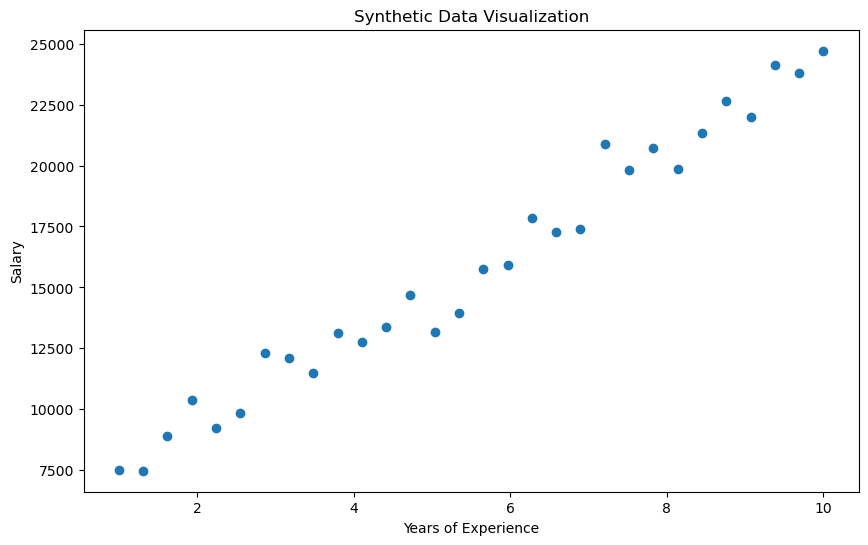

In [4]:
try:
    df = pd.read_csv(SLR_DATAPATH)
    X = df[SLR_XCOL].values
    y = df[SLR_YCOL].values
    
    print(f"Dataset loaded with {len(X)} samples")
    print(f"First 5 samples:\n{df.head()}")
    
    # Quick visualization of the raw data
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y)
    plt.title('Raw Data Visualization')
    plt.xlabel(SLR_XCOL)
    plt.ylabel(SLR_YCOL)
    plt.show()
    
except FileNotFoundError:
    print(f"Dataset not found at {SLR_DATAPATH}")
    print("Creating synthetic data for demonstration...")
    
    # Create synthetic data
    np.random.seed(42)
    X = np.linspace(1, 10, 30)
    y = 5000 + 2000 * X + np.random.normal(0, 1000, 30)
    
    # Visualize synthetic data
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y)
    plt.title('Synthetic Data Visualization')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()

## Train the Simple Linear Regression Model

  0%|          | 0/1000 [00:00<?, ?it/s]

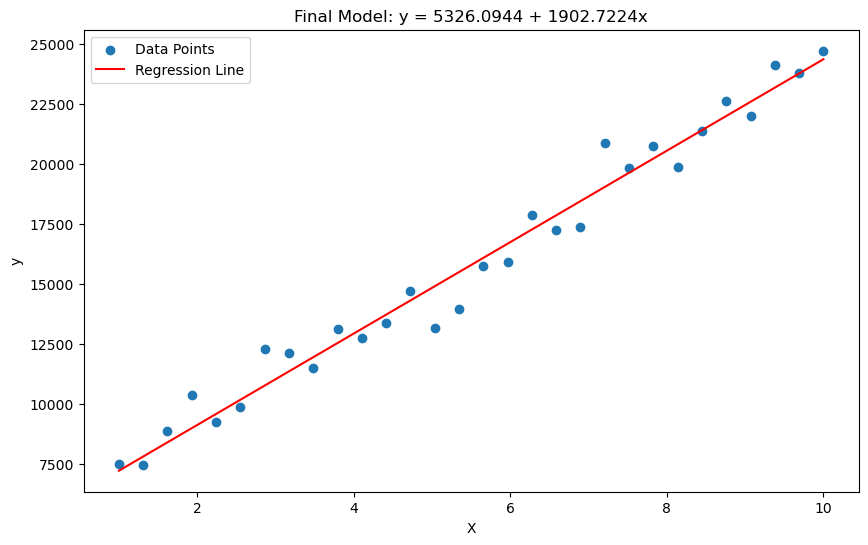

Final parameters: theta0 = 5326.0944, theta1 = 1902.7224
Final loss: 20783162.2995


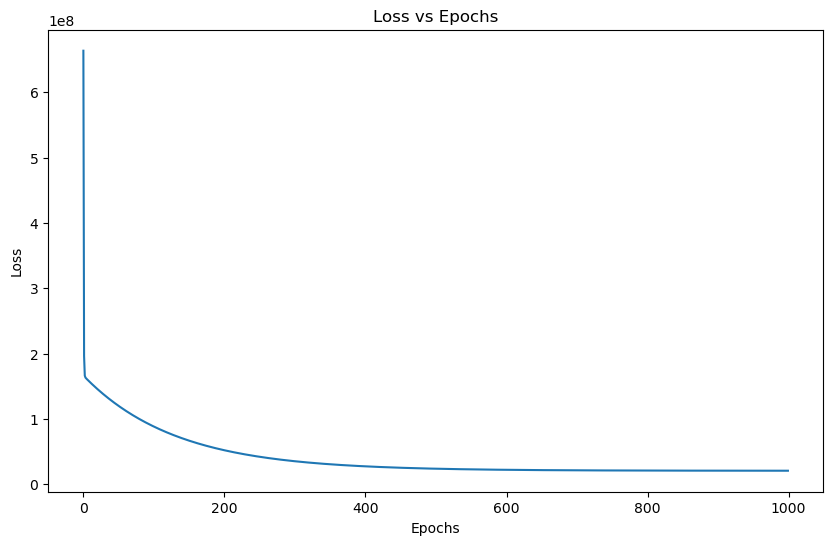

In [5]:
# Initialize and train the model
slr = SimpleLinearRegression(X, y, epochs=1000, lr=0.01)
animation = slr.train()

## Animation of Learning Process

In [6]:
# Display the animation
animation

## White's Test for Heteroscedasticity

In [7]:
# Check for heteroscedasticity using White's test
white_test_results = slr.whitetest()
for name, value in white_test_results:
    print(f"{name}: {value}")
    
# Interpret the results
p_value = white_test_results[1][1]
print("\nInterpretation:")
if p_value < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is evidence of heteroscedasticity in the model.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant evidence of heteroscedasticity in the model.")

Lagrange multiplier statistic: 2.342150937849894
p-value: 0.31003333069088157
f-value: 1.1432211373314771
f p-value: 0.33374248177378396

Interpretation:
The p-value is greater than 0.05, so we fail to reject the null hypothesis.
There is no significant evidence of heteroscedasticity in the model.


## Predictions with the Trained Model

Predictions:
For YearsExperience = 2, predicted Salary = 9131.54
For YearsExperience = 5, predicted Salary = 14839.71
For YearsExperience = 8, predicted Salary = 20547.87
For YearsExperience = 10, predicted Salary = 24353.32


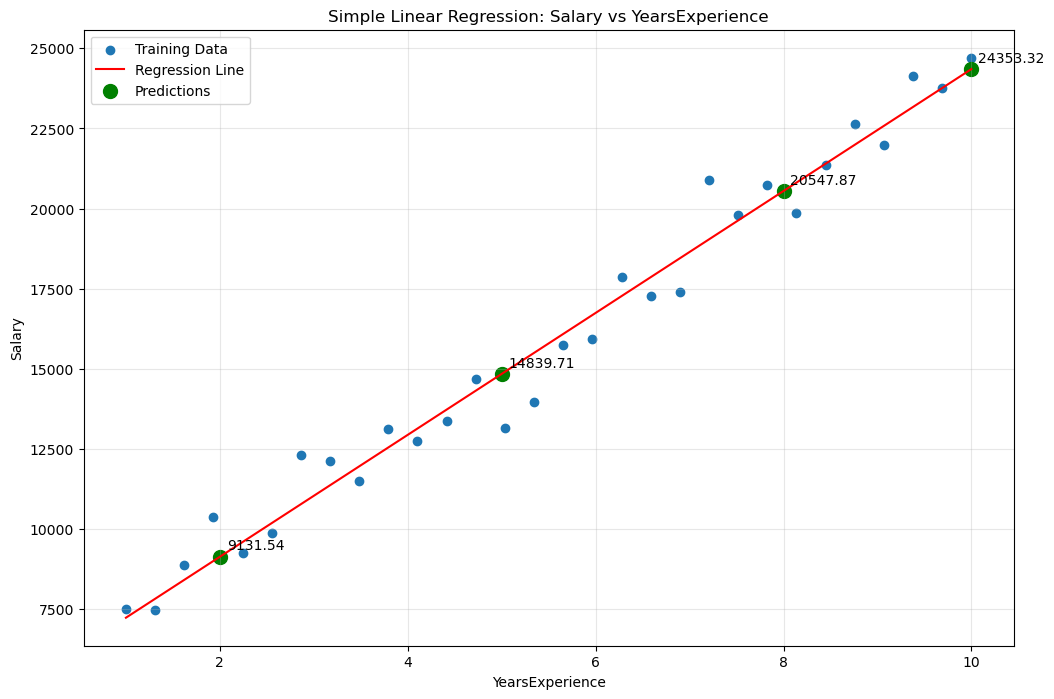

In [8]:
# Function to make predictions with our model
def predict(x_value):
    return slr.theta0 + slr.theta1 * x_value

# Let's make some predictions
test_values = [2, 5, 8, 10]
print("Predictions:")
for x in test_values:
    print(f"For {SLR_XCOL} = {x}, predicted {SLR_YCOL} = {predict(x):.2f}")

# Create a scatter plot with regression line and some prediction points
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Training Data')
x_line = np.linspace(min(X), max(X), 100)
y_line = [predict(x) for x in x_line]
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Highlight predictions
predictions = [predict(x) for x in test_values]
plt.scatter(test_values, predictions, color='green', s=100, label='Predictions')

for i, (x, y_pred) in enumerate(zip(test_values, predictions)):
    plt.annotate(f'{y_pred:.2f}', (x, y_pred), xytext=(5, 5), textcoords='offset points')

plt.title(f'Simple Linear Regression: {SLR_YCOL} vs {SLR_XCOL}')
plt.xlabel(SLR_XCOL)
plt.ylabel(SLR_YCOL)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Compare with Statsmodels Implementation

In [9]:
# Compare with statsmodels
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

print("\nComparison of coefficients:")
print(f"Our implementation: intercept = {slr.theta0:.4f}, slope = {slr.theta1:.4f}")
print(f"Statsmodels: intercept = {model.params[0]:.4f}, slope = {model.params[1]:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1042.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.07e-23
Time:                        00:38:02   Log-Likelihood:                -244.25
No. Observations:                  30   AIC:                             492.5
Df Residuals:                      28   BIC:                             495.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5434.6062    357.838     15.187      0.0